In [ ]:
# Name:SRIRAM GOPALAN G
# TASK 1:BIG DATA ANALYSIS

In [ ]:
# Task 1 - Heart Disease Dataset Analysis

In [ ]:
pip install pyspark pandas matplotlib seaborn

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max, min, count
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder \
    .appName("Heart Disease Analysis") \
    .getOrCreate()

In [ ]:
file_path = "heart.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
print("Dataset Schema:")
data.printSchema()

Dataset Schema:
root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [ ]:
print("Sample Data:")
data.show(5)

Sample Data:
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 52|  1|  0|     125| 212|  0|      1|    168|    0|    1.0|    2|  2|   3|     0|
| 53|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|
| 70|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|
| 61|  1|  0|     148| 203|  0|      1|    161|    0|    0.0|    2|  1|   3|     0|
| 62|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows



In [ ]:
total_records = data.count()
print(f"Total number of records: {total_records}")

Total number of records: 1025


In [ ]:
print("Distribution of Heart Disease (target):")
data.groupBy("target").count().show()

Distribution of Heart Disease (target):
+------+-----+
|target|count|
+------+-----+
|     1|  526|
|     0|  499|
+------+-----+



In [ ]:
print("Average Age of Patients with and without Heart Disease:")
avg_age = data.groupBy("target").agg(avg(col("age")).alias("Average Age"))
avg_age.show()

Average Age of Patients with and without Heart Disease:
+------+------------------+
|target|       Average Age|
+------+------------------+
|     1| 52.40874524714829|
|     0|56.569138276553105|
+------+------------------+



In [ ]:
if "cp" in data.columns:
    print("Distribution of Chest Pain Types:")
    data.groupBy("cp").count().orderBy(col("count").desc()).show()

Distribution of Chest Pain Types:
+---+-----+
| cp|count|
+---+-----+
|  0|  497|
|  2|  284|
|  1|  167|
|  3|   77|
+---+-----+



In [ ]:
filtered_data = data.filter((col("age") > 60) & (col("target") == 1))
print("Patients older than 60 with heart disease:")
filtered_data.show(5)

Patients older than 60 with heart disease:
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 71|  0|  0|     112| 149|  0|      1|    125|    0|    1.6|    1|  0|   2|     1|
| 67|  0|  0|     106| 223|  0|      1|    142|    0|    0.3|    2|  2|   2|     1|
| 63|  0|  2|     135| 252|  0|      0|    172|    0|    0.0|    2|  0|   2|     1|
| 64|  1|  0|     128| 263|  0|      1|    105|    1|    0.2|    1|  1|   3|     1|
| 65|  0|  2|     160| 360|  0|      0|    151|    0|    0.8|    2|  0|   2|     1|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows



In [ ]:
filtered_pandas = filtered_data.toPandas()

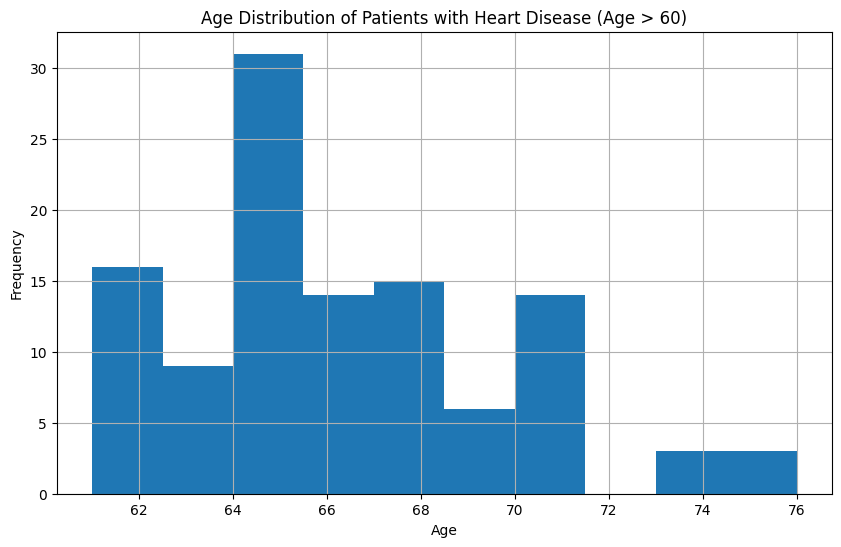

In [ ]:
plt.figure(figsize=(10, 6))
filtered_pandas["age"].hist(bins=10)
plt.title("Age Distribution of Patients with Heart Disease (Age > 60)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
spark.stop()